<img src='../images/wcd_logo.png' width='50%'>
-------------

<h3 align='center'> WCD Machine Learning Course</h3>
<h1 align='center'> Logistic Regression Exercise </h1>

<br>
<center align="left"> Developed by: </center>
<center align="left"> WeCloudData Academy </center>



Data comes from the [Glass Identification Dataset](https://archive.ics.uci.edu/ml/datasets/glass+identification)

Features:

1. Id number: 1 to 214 
2. RI: refractive index 
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
4. Mg: Magnesium 
5. Al: Aluminum 
6. Si: Silicon 
7. K: Potassium 
8. Ca: Calcium 
9. Ba: Barium 
10. Fe: Iron 
11. Type of glass: (class attribute) 

&nbsp;&nbsp;&nbsp;&nbsp; 1 building_windows_float_processed 

&nbsp;&nbsp;&nbsp;&nbsp; 2 building_windows_non_float_processed 

&nbsp;&nbsp;&nbsp;&nbsp; 3 vehicle_windows_float_processed 

&nbsp;&nbsp;&nbsp;&nbsp; 4 vehicle_windows_non_float_processed (none in this database) 

&nbsp;&nbsp;&nbsp;&nbsp; 5 containers 

&nbsp;&nbsp;&nbsp;&nbsp; 6 tableware 

&nbsp;&nbsp;&nbsp;&nbsp; 7 headlamps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True

In [6]:
# glass identification dataset
file_name = 'glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(file_name, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


### Try a regression problem first
* Target "ri"
* Predictor "al"

(1.51015, 1.53493)

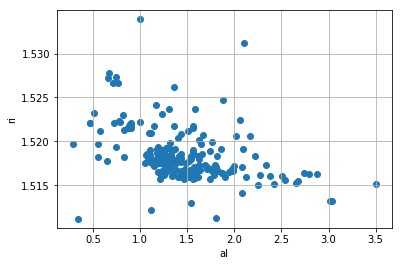

In [7]:
plt.scatter(x = glass.al, y = glass.ri)
plt.xlabel("al")
plt.ylabel("ri")
plt.ylim(min(glass.ri) - 0.001, max(glass.ri) + 0.001)

In [14]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
predictor = ['al']
X = glass[predictor]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0,0.5,'Predicted ri')

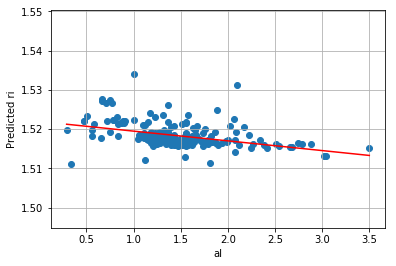

In [8]:
# plot those predictions connected by a line
plt.scatter(x = glass.al, y = glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

## Logistic Regression

### Define Target

In [9]:
glass['glass_type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

In [9]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [10]:
# Create binary target
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass

glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


In [11]:
glass['household'].value_counts()

0    163
1     51
Name: household, dtype: int64

Text(0,0.5,'household')

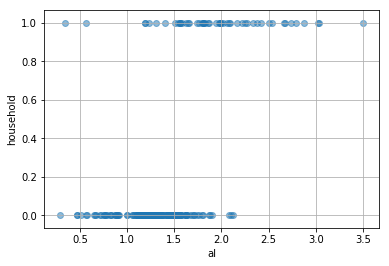

In [12]:
# Use household as the target variable and plot the relationship between predictor and target
plt.scatter(glass.al, glass.household, alpha=0.5)
plt.xlabel('al')
plt.ylabel('household')

### Try a regression model first

In [15]:
### Try a regression model to fit the binary data
predictor = ['al']
X = glass[predictor]
y = glass.household
linreg.fit(X, y)
glass['household_linear_pred'] = linreg.predict(X)

Text(0,0.5,'household')

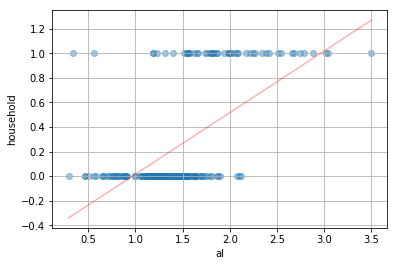

In [16]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household, alpha=0.4)
plt.plot(glass.al, glass.household_linear_pred, color='red', alpha=0.3)
plt.xlabel('al')
plt.ylabel('household')

If al=3, what class do we predict for household? ==> 1   
If al=1.5, what class do we predict for household? ==> 0   
We predict the 0 class for lower values of al, and the 1 class for higher values of al. What's our cutoff value?    Around al=2, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.   
Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

### Select a cutoff point 

In [17]:
# transform household_pred to 1 or 0
glass['household_linear_pred_class'] = np.where(glass.household_linear_pred >= 0.5, 1, 0)
glass[['ri', 'al', 'household', 'household_linear_pred', 'household_linear_pred_class']][glass['al']>1.8].head(20)

,ri,al,household,household_linear_pred,household_linear_pred_class
id,,,,,
186,1.51131,1.81,1,0.421294,0
118,1.51708,1.81,0,0.421294,0
208,1.51831,1.82,1,0.426306,0
169,1.51666,1.83,1,0.431318,0
165,1.51915,1.86,1,0.446353,0
207,1.51645,1.87,1,0.451365,0
90,1.51640,1.87,0,0.451365,0
106,1.52475,1.88,0,0.456377,0
80,1.51590,1.90,0,0.466400,0


Text(0,0.5,'household')

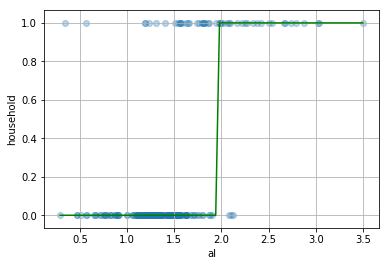

In [18]:
# plot the class predictions
plt.scatter(glass.al, glass.household, alpha=0.3)
plt.plot(glass.al, glass.household_linear_pred_class, color='green')
plt.xlabel('al')
plt.ylabel('household')

In [19]:
### Linear Regression Prediction Accuracy

glass[glass['household']==glass['household_linear_pred_class']].shape[0] / float(glass.shape[0])

0.8644859813084113

### Fit a Logistic Regression

In [20]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
predictor = ['al']
X = glass[predictor]
y = glass.household
logreg.fit(X, y)
glass['household_logistic_pred_class'] = logreg.predict(X)

Text(0,0.5,'household')

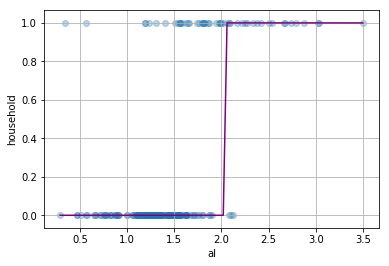

In [21]:
# plot the class predictions
plt.scatter(glass.al, glass.household, alpha=0.3)
plt.plot(glass.al, glass.household_logistic_pred_class, color='purple')
plt.xlabel('al')
plt.ylabel('household')

In [22]:
### Logistic Regression Prediction Accuracy
glass[glass['household']==glass['household_logistic_pred_class']].shape[0] / float(glass.shape[0])

0.8411214953271028

### Predicted Probabilities

In [28]:
# store the predicted probabilites of class 1
glass['household_logistic_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [23]:
logreg # model that we fit our data to

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
logreg.predict(X) # giving you the 0s and 1s, above and below 0.5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
logreg.predict_proba(X) # first column = prob of it being 0, second column prob of it being 1

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ],
       [0.95265323, 0.04734677],
       [0.95265323, 0.04734677],
       [0.95080573, 0.04919427],
       [0.94378757, 0.05621243],
       [0.94271112, 0.05728888],
       [0.94161533, 0.05838467],
       [0.93703277, 0.06296723],
       [0.93583576, 0.06416424],
       [0.93211646, 0.06788354],
       [0.93211646, 0.06788354],
       [0.92952688, 0.07047312],
       [0.92819811, 0.07180189],
       [0.92684626, 0.07315374],
       [0.92264896, 0.07735104],
       [0.9212015 , 0.0787985 ],
       [0.9212015 , 0.0787985 ],
       [0.91516104, 0.08483896],
       [0.91516104, 0.08483896],
       [0.91358659, 0.08641341],
       [0.91198573, 0.08801427],
       [0.91035812, 0.08964188],
       [0.91035812, 0.08964188],
       [0.90870343, 0.09129657],
       [0.89253652, 0.10746348],
       [0.89253652, 0.10746348],
       [0.

In [26]:
logreg.predict_proba(X)[:,1]

array([0.02806625, 0.03094319, 0.03982038, 0.03982038, 0.0430124 ,
       0.04734677, 0.04734677, 0.04919427, 0.05621243, 0.05728888,
       0.05838467, 0.06296723, 0.06416424, 0.06788354, 0.06788354,
       0.07047312, 0.07180189, 0.07315374, 0.07735104, 0.0787985 ,
       0.0787985 , 0.08483896, 0.08483896, 0.08641341, 0.08801427,
       0.08964188, 0.08964188, 0.09129657, 0.10746348, 0.10746348,
       0.11749519, 0.11959648, 0.12173017, 0.12389656, 0.12832872,
       0.13059509, 0.13059509, 0.13059509, 0.13289538, 0.13289538,
       0.13289538, 0.13759889, 0.13759889, 0.14000267, 0.14000267,
       0.14244152, 0.14244152, 0.14491569, 0.14491569, 0.14742545,
       0.14742545, 0.14742545, 0.14997105, 0.14997105, 0.14997105,
       0.14997105, 0.14997105, 0.14997105, 0.15255274, 0.15517077,
       0.15517077, 0.15782535, 0.16051672, 0.16051672, 0.16051672,
       0.16051672, 0.16051672, 0.16324508, 0.16324508, 0.16601065,
       0.16601065, 0.16601065, 0.16881363, 0.16881363, 0.16881

Text(0,0.5,'household')

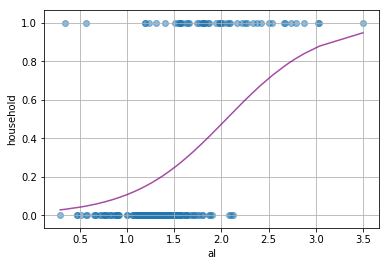

In [29]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household, alpha=0.5)
plt.plot(glass.al, glass.household_logistic_pred_prob, color='purple', alpha=0.7)
plt.xlabel('al')
plt.ylabel('household')

In [30]:
# Create Predictions
# In the predict_proba output, the first column indicates the predicted probability of class 0, 
# and the second column indicates the predicted probability of class 1.
print (logreg.predict_proba(1))
print (logreg.predict_proba(2))
print (logreg.predict_proba(3))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]


### Understanding Odds, Log-Odds and Probabilities

$$ odds = \frac{one \ outcome}{all \ other \ outcome}$$

$$ probability = \frac{odds}{1 + odds}$$
Dice roll of 1: probability = 1/6, odds = 1/5   
Even dice roll: probability = 3/6, odds = 3/3 = 1   
Dice roll less than 5: probability = 4/6, odds = 4/2 = 2   

In [31]:

# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [32]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


### Logistic Regression and Log-Odds

Logistic regression: log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:
$$\log \left({p\over 1-p}\right) = \theta_0 + \theta_1x$$
This is called the **logit** function.

The equation can be rearranged into the logistic function:
$$p = \frac{e^{\theta_0 + \theta_1x}} {1 + e^{\theta_0 + \theta_1x}}$$

Text(0,0.5,'household')

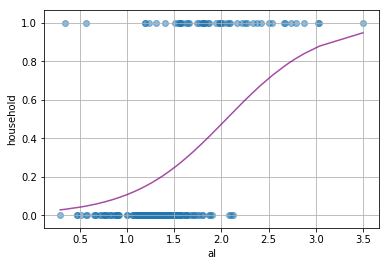

In [33]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household, alpha=0.5)
plt.plot(glass.al, glass.household_logistic_pred_prob, color='purple', alpha=0.7)
plt.xlabel('al')
plt.ylabel('household')

In [34]:
# examine the coefficient for al
## logreg = LogisticRegression()
zip(predictor, logreg.coef_[0])   # theta 1

In [36]:
logreg.intercept_  # theta 0

array([-4.12790736])

In [37]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.10592543])

In [38]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([0.89949172])

In [40]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.47354338])

In [41]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([0.47354338])

### Interpretation of Logistic Regression 

A 1 unit increase in variable 'al' is associated with a 4.18 unit increase in the **log-odds** of 'household'.

In [42]:
logreg.predict_proba(2)[:, 1]

array([0.47354338])

In [43]:
logreg.predict_proba(3)[:, 1]

array([0.87046377])

In [44]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 3
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.87046377])

In [35]:
# compute predicted probability for al=3 using the predict_proba method
